# HTML

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!ls #Ver a localização desse script nas pastas

data				 Review_html_Completo.ipynb
Exercicio2_scraper_Felipe.ipynb  review_html.ipynb
Exercicio_first_scraper.ipynb	 Web_Scraping.pdf


In [0]:
if (True):
  import os
  os.chdir("drive/My Drive/Aula 02 - Web Scraping/")  #MAPEAR PARA O LOCAL NO DRIVE ONDE SE ENCONTRA ESSE ARQUIVO

FileNotFoundError: ignored

- HTML é uma abreviação para **HyperText Markup Language**. É uma linguagem para apresentar conteúdo na Internet.

- Texto é transformado em um documento HTML por **tags** que são interpretadas pelo browser.

- Usando Beautiful Soup podemos facilmente extrair os valores das tags the um código fonte HTML.

## Beautiful Soup X Regular Expression

In [0]:
# the source code of hi.html
!cat data/oi.html
# Windows user
# !type data/oi.html

<!DOCTYPE html>
<html>
    <head>
        <title>Oi</title> <!--Sou um comentário, me ignore.-->
    </head>
    <body>
        <a href='http://www.cce.puc-rio.br/sitecce/website/website.dll/folder?nCurso=bi-master&nInst=cce'>Oi, BI Master!</a>
    </body>
</html>

### Exemplo:
- Extrair os caracteres entre a tag 'title'. 

- Nesse caso é `Oi` (`<title>Oi</title>`).

- **Solução usando expressão regular**

In [0]:
import re
hi_path = 'data/oi.html'
with open(hi_path, 'r') as f:
    hi = f.read()
    print(re.findall('<title>(.*)</title>', hi))

['Oi']


- **Solução usando BeautifulSoup**

In [0]:
from bs4 import BeautifulSoup
with open(hi_path, 'r') as f:
    hi = f.read()
    hi = BeautifulSoup(hi, 'html.parser')
    print(hi.title) # find the title tag
    print(hi.title.string)  # find the value of tag

<title>Oi</title>
Oi


In [0]:
print(hi.head)

<head>
<title>Oi</title> <!--Sou um comentário, me ignore.-->
</head>


**Comparado com expressão regular:**
    
- A sintaxe do Beautiful Soup é muito mais simples, enquanto expressões regulares são mais flexíveis.

## Introdução à HTML

### Tag

- A tag `<title>` nesse exemplo designa o texto que deve ser exibido na aba do browser.
- Tags são sempre colocadas entre `<` e `>` para distinguí-los do conteúdo. 
- Um par de tags consiste de uma tag inicial e uma tag final com o mesmo nome, mas a tag final é precedida de uma barra `/`.

### Valores

Valores são o conteúdo entre tag inicial e final.

- **Exemplo**

`<title>Oi</title>`: É a tag `title` com o valor `Oi`.

### Elemento

Elementos são formados a partir de Tags e entre as Tags é que está o conteúdo do Elemento.

### Atributos
Atributos são informações que passamos na Tag.

- **Exemplo**

`<a href='http://www.cce.puc-rio.br/sitecce/website/website.dll/folder?nCurso=bi-master&nInst=cce'>Oi, BI Master!</a>`

A tag `<a>` com atributo `href` e hyperlink—http://www.cce.puc-rio.br/sitecce/website/website.dll/folder?nCurso=bi-master&nInst=cce.
Esse atributo cria uma associação do texto com o endereço (hyperlink).

### Estrutura em árvore
- O primeiro elemento do exemplo é o elemento `<html>`. 


- Entre a tag `<html>`, várias tags são abertas e fechadas: `<head>, <title>` , e `<body>, <a>`.

    - As tags `<head>` e `<body>` são diretamente envolvidas pelo elemento `<html>`. 
    - O elemento `<title>` está envolvido pela tag `<head>`.
    - O elemento `<a>` está envolvido pela tag `<body>`.


- Para descrever múltiplas camadas de um documento HTML podemos usar a analogia da árvore.

![html](data/html.png)

- O elemento <html> é o elemento raiz que divide em dois ramos, `<head>` e `<body>`; `<head>` é seguido por outro ramo chamado `<title>`; `<body>` é seguido por outro ramo chamado `<a>`.

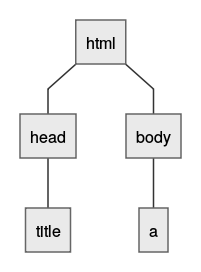

In [0]:
from IPython.display import Image
Image(filename="data/html.png", )

## Básico do Beautiful Soup

### Parse HTML

- O método `prettify()` adiciona identação aos elementos para ajudar a entender a estrutura da árvore do documento HTML.

In [0]:
from bs4 import BeautifulSoup
# open a local file and parse the plain text by BeautifulSoup directly
with open(hi_path, 'r') as f:
    hi = f.read()
    hi = BeautifulSoup(hi, 'html.parser')
    print(type(hi)) # get a bs4.BeautifulSoup object
    print('\n')
    print(hi)
    print('\n')
    print(hi.prettify())


<class 'bs4.BeautifulSoup'>


<!DOCTYPE html>

<html>
<head>
<title>Oi</title> <!--Sou um comentário, me ignore.-->
</head>
<body>
<a href="http://www.cce.puc-rio.br/sitecce/website/website.dll/folder?nCurso=bi-master&amp;nInst=cce">Oi, BI Master!</a>
</body>
</html>


<!DOCTYPE html>
<html>
 <head>
  <title>
   Oi
  </title>
  <!--Sou um comentário, me ignore.-->
 </head>
 <body>
  <a href="http://www.cce.puc-rio.br/sitecce/website/website.dll/folder?nCurso=bi-master&amp;nInst=cce">
   Oi, BI Master!
  </a>
 </body>
</html>


### Nomes, valores e atributos

Beautiful Soup pode extrair o nome, valor e atributos de tags. Os métodos correspondentes são:
- name
- string
- attrs

In [0]:
print("O nome da tag a é: ", hi.a.name)
print("O valor da tag a é: ", hi.a.string)
print("Os atributos da tag a são: ", hi.a.attrs)

O nome da tag a é:  a
O valor da tag a é:  Oi, BI Master!
Os atributos da tag a são:  {'href': 'http://www.cce.puc-rio.br/sitecce/website/website.dll/folder?nCurso=bi-master&nInst=cce'}


### get_text() & get()
- Para tags que tem tags filhas o método string não funciona

In [0]:
print(hi.html.string)

None


- Ao invés podemos usar o método get_text. O método `get_text()` vai extrair todo o conteúdo das tags filhas.

In [0]:
print(hi.html.get_text())



Oi 


Oi, BI Master!




In [0]:
print(hi.html.text)



Oi 


Oi, BI Master!




- `get()` é usado para encontrar atributos de uma tag. Por exemplo, podemos extrair href da tag `a` usando o seguinte código:

In [0]:
print(hi.a.get('href'))

http://www.cce.puc-rio.br/sitecce/website/website.dll/folder?nCurso=bi-master&nInst=cce


- É o mesmo que rodar `hi.a.attrs` e achar o valor da chave `href` do dicionário.

In [0]:
print(hi.a.attrs)

{'href': 'http://www.cce.puc-rio.br/sitecce/website/website.dll/folder?nCurso=bi-master&nInst=cce'}


### find() & find_all()
As funções `find` e `findall` são flexíveis para achar tags.

In [0]:
!cat data/artigo.html
# Windows user
# !type data/artigo.html

<!DOCTYPE html>
<html>
    <head>
        <title>Artigo</title>
    </head>
    <body>
        <h1 id='one'>Um</h1>
        	<p>Esse é o primeiro parágrafo.</p>
        <h2 id='two'>Dois</h2>
        	<p><a href='www.google.com'>Aqui está o site do google.</a></p>
        <h3 id='three'>Três</h3>
        	<p>Esse é o terceiro parágrafo.</p>
    </body>
</html>


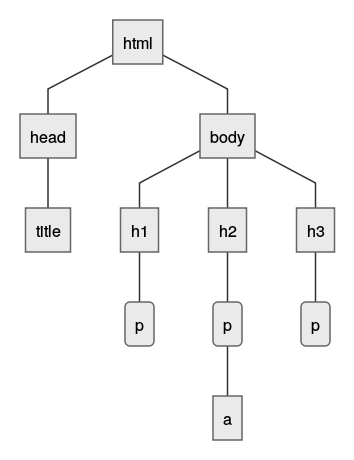

In [0]:
from IPython.display import Image
Image(filename="data/artigo.png", )

In [0]:
article_path = 'data/artigo.html'
with open(article_path, 'r') as f:
    article = f.read()
    article = BeautifulSoup(article, 'html.parser')

- Retornar só a primeira tag `p`.

In [0]:
print(article.p)

<p>Esse é o primeiro parágrafo.</p>


- `find()` retorna a primeira tag p, que é equivalente a article.p

In [0]:
print(article.find('p'))

<p>Esse é o primeiro parágrafo.</p>


- `find_all()` retorna todas as tags p

In [0]:
print(article.find_all('p'))

[<p>Esse é o primeiro parágrafo.</p>, <p><a href="www.google.com">Aqui está o site do google.</a></p>, <p>Esse é o terceiro parágrafo.</p>]


- Para achar as tags com algum atributo específico você pode passar um dicionário no argumento `attrs`.

In [0]:
print(article.find_all('h1', attrs={'id':'one'}))

[<h1 id="one">Um</h1>]


- Você também pode especificar uma função para extrair uma lista de Tags que coincidem com critério definido.
- É o mesmo que:

In [0]:
print(article.find_all(lambda tag: tag.get('id') == 'one'))

[<h1 id="one">Um</h1>]


## Exemplos

### Python User Group Calendar

Vamos extrair a data, localização e título do evento da página [Python User Group Calendar](https://www.python.org/events/python-user-group/).

In [0]:
import requests
response = requests.get('https://www.python.org/events/python-user-group/')
print(response.status_code)
text = BeautifulSoup(response.text, 'html.parser')

200


#### Título
1. Títulos estão nas tags `h3` com atributo `class="event-title"`.

In [0]:
titleTags = text.find_all('h3',{'class': 'event-title'})## Completar
titleTags

[<h3 class="event-title"><a href="/events/python-user-group/835/">PyCon Latam 2019</a></h3>,
 <h3 class="event-title"><a href="/events/python-user-group/829/">Django Girls Abuja</a></h3>,
 <h3 class="event-title"><a href="/events/python-user-group/858/">Python Mauritius UserGroup (Pymug) June Meetup</a></h3>]

2. Percorrer cada tag e extrair o texto

In [0]:
titleString = [tag.text for tag in titleTags]## Completar
titleString

['PyCon Latam 2019',
 'Django Girls Abuja',
 'Python Mauritius UserGroup (Pymug) June Meetup']

3. Como pegar somente os títulos de eventos que estão por vir

In [0]:
titleTags = text.find(attrs= {'class': 'list-recent-events menu'}) ## Completar
titleTags = titleTags.find_all('h3',{'class':'event-title'})
titleTags
titleString = [tag.text for tag in titleTags] ## Completar
titleString

['PyCon Latam 2019']

#### Data
4. Datas estão nas tags `time` com atributo `datetime`.

In [0]:
timeTags = text.find_all(lambda tag:'datetime' in tag.attrs)## Completar
timeTags

[<time datetime="2019-08-29T00:00:00+00:00">29 Aug. – 31 Aug. <span class="say-no-more"> 2019</span></time>,
 <time datetime="2019-06-28T00:00:00+00:00">28 June – 29 June <span class="say-no-more"> 2019</span></time>,
 <time datetime="2019-06-23T06:00:00+00:00">23 June<span class="say-no-more"> 2019</span> 6am UTC – 10am UTC</time>]

5. Percorrer cada tag e extrair as datas

In [0]:
timeString = [tag.get('datetime') for tag in timeTags] ## Completar
timeString

['2019-08-29T00:00:00+00:00',
 '2019-06-28T00:00:00+00:00',
 '2019-06-23T06:00:00+00:00']

#### Local
6. Locais estão nas tags `span` com atributo `class="envet-location"`.

In [0]:
locationTags = text.find_all("span", {'class': "event-location"})## Completar
locationTags

[<span class="event-location">Hotel Friendly, Puerto Vallarta, México</span>,
 <span class="event-location">Abuja, Nigeria</span>,
 <span class="event-location">Curepipe, Mauritius</span>]

7. Percorrer cada tag e extrair os locais

In [0]:
locationString = [tag.text for tag in locationTags]## Completar
locationString

['Hotel Friendly, Puerto Vallarta, México',
 'Abuja, Nigeria',
 'Curepipe, Mauritius']

- Vamos resumir rapidamente o que nós temos até agora.
- O fluxo de um projeto web scraping é:
 - Achar um atributo único que vai localizar as tags que estamos interessados.
 - Nós queremos achar a tag do evento que suas tags filhas contenham título, data e localização que queremos salvar no arquivo csv.
 - **uma tag única -> uma linha no arquivo csv**
 - Depois vamos descendo os níveis para achar as tags filhas de cada evento.
 - As tags do evento tem uma classe de atributo única igual a **list-recent-events menu**.
 - A próxima pergunta é: qual a melhor estrutura de dados para representar um único evento?

In [0]:
result = []
uls = text.find_all('ul', {'class': 'list-recent-events menu'})
for ul in uls:
    lis = ul.find_all('li')
    for li in lis:
        event = {}
        try:
            title = li.find('a').string
        except:
            continue       
        try:
            time = li.find('time').get('datetime')
        except:
            time = ""
        try:
            location = li.find('span', {'class':'event-location'}).string.strip()
        except:
            location = ""
            
        event['location'] = location
        event['time'] = time
        event['title'] = title
        result.append(event)

In [0]:
result

[{'location': 'Hotel Friendly, Puerto Vallarta, México',
  'time': '2019-08-29T00:00:00+00:00',
  'title': 'PyCon Latam 2019'},
 {'location': 'Abuja, Nigeria',
  'time': '2019-06-28T00:00:00+00:00',
  'title': 'Django Girls Abuja'},
 {'location': 'Curepipe, Mauritius',
  'time': '2019-06-23T06:00:00+00:00',
  'title': 'Python Mauritius UserGroup (Pymug) June Meetup'}]

### Scrape Yelp Reviews

- Nossa tarefa é extrair todos os reviews do Vessel no Yelp. https://www.yelp.com/biz/vessel-hudson-yards-new-york

#### Passo 1: Achar o padrão da url

In [0]:
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
           "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"
            }

response = requests.get('https://www.yelp.com/biz/vessel-hudson-yards-new-york', headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

In [0]:
response.status_code

200

- Se navegarmos para a segunda pagina, podemos ver que a estrutura da url fica https://www.yelp.com.br/biz/vessel-hudson-yards-new-york?start=20
- Similarmente, a url da terceira página é: https://www.yelp.com.br/biz/vessel-hudson-yards-new-york?start=40
- Mas como achamos a url da última página?

In [0]:
import re
num_reviews = soup.find('span', attrs={'class': 'review-count rating-qualifier'}).string
num_reviews = int(re.search('\d+', num_reviews).group())
print(num_reviews)

130


In [0]:
url_list = []
for i in range(0, num_reviews, 20):
    url_list.append('https://www.yelp.com/biz/vessel-hudson-yards-new-york?start='+str(i))
print(url_list)

['https://www.yelp.com/biz/vessel-hudson-yards-new-york?start=0', 'https://www.yelp.com/biz/vessel-hudson-yards-new-york?start=20', 'https://www.yelp.com/biz/vessel-hudson-yards-new-york?start=40', 'https://www.yelp.com/biz/vessel-hudson-yards-new-york?start=60', 'https://www.yelp.com/biz/vessel-hudson-yards-new-york?start=80', 'https://www.yelp.com/biz/vessel-hudson-yards-new-york?start=100', 'https://www.yelp.com/biz/vessel-hudson-yards-new-york?start=120']


#### Passo 2: Achar todos os divs de review na pagina

In [0]:
reviews = soup.find_all('div', attrs={'class': 'review review--with-sidebar'})
print(len(reviews))

20


#### Passo 3: Extrair a informação detalhada

Com o próposito de debugar, nós geralmente testamos com um review e depois aplicamos para os outros.

In [0]:
review = reviews[0]

# Username
username = review.find('a', attrs={'class': 'user-display-name js-analytics-click'}).string
print(username)

Anna A.


In [0]:
# Location
location = review.find('li', attrs={'class': 'user-location responsive-hidden-small'}).get_text().strip()
print(location)

NJ, NJ


In [0]:
# Rating
rating = review.find('img', attrs={'class': 'offscreen'}).get('alt')
rating = float(re.search('\d+', rating).group())
print(rating)

5.0


In [0]:
# Date
date = review.find('span', attrs={'class': 'rating-qualifier'}).get_text().strip()
print(date)

7/7/2019


In [0]:
# Content
content = review.find('p').get_text()
print(content)

Unexpected visit to this new gem in NYC! Those stairs are no joke but the view is spectacular, enjoyed having the view of the city and part of NJ. It was a nice stroll on a Saturday evening in the city! There is a mall In the area and a few restaurants in the area, close to other sightseeing locations.


#### Passo 4: Aplicar para todos os reviews e salvar em um arquivo csv

In [0]:
import csv
with open('reviews_first_page.csv', 'w') as csvfile:
    review_writer = csv.writer(csvfile)
    for review in reviews:
        dic = {}
        username = review.find('a', attrs={'class': 'user-display-name js-analytics-click'}).string
        location = review.find('li', attrs={'class': 'user-location responsive-hidden-small'}).get_text().strip()
        date = review.find('span', attrs={'class': 'rating-qualifier'}).get_text().strip()
        rating = review.find('img', attrs={'class': 'offscreen'}).get('alt')
        rating = float(re.search('\d+', rating).group())
        content = review.find('p').text
        dic['username'] = username
        dic['location'] = location
        dic['date'] = date
        dic['rating'] = rating
        dic['content'] = content
        review_writer.writerow(dic.values())

#### Passo 5: Aplicar para todas as páginas

In [0]:
import time
import random


def scrape_single_page(reviews, csvwriter):
    for review in reviews:
        dic = {}
        username = review.find('a', attrs={'class': 'user-display-name js-analytics-click'}).text
        location = review.find('li', attrs={'class': 'user-location responsive-hidden-small'}).text.strip()
        date = review.find('span', attrs={'class': 'rating-qualifier'}).text.strip()
        rating = review.find('img', attrs={'class': 'offscreen'}).get('alt')
        rating = float(re.search('\d+', rating).group())
        content = review.find('p').text
        dic['username'] = username
        dic['location'] = location
        dic['date'] = date
        dic['rating'] = rating
        dic['content'] = content
        csvwriter.writerow(dic.values())
    

with open('reviews.csv', 'w') as csvfile:
    review_writer = csv.writer(csvfile)
    for index, url in enumerate(url_list):
        response = requests.get(url, headers=headers).text
        soup = BeautifulSoup(response, 'html.parser')
        reviews = soup.find_all('div', attrs={'class':'review review--with-sidebar'})
        scrape_single_page(reviews, review_writer)
        # Random sleep to avoid getting banned from the server
        time.sleep(random.randint(1,3))
        # Log the progress
        print('Finished page ' + str(index + 1))

Finished page 1
Finished page 2
Finished page 3
Finished page 4
Finished page 5
Finished page 6
Finished page 7


### Análise de sentimentos dos reviews

In [0]:
!pip install textblob
from textblob import TextBlob

Para utilizar o modelo de análise de sentimento dessa biblioteca, precisamos limpar o texto primeiro

In [0]:
def clean_text(text):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split()) 

Criamos uma função para processar o texto

In [0]:
def get_sentiment(text): 
        analysis = TextBlob(clean_text(text)) 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

O modelo retorna uma polaridade que indica se o texto tem uma conotação positiva, negativa ou neutra

Vamos importar os reviews salvos e analisar o resultado

In [0]:
import pandas as pd

In [0]:
reviews = pd.read_csv('reviews.csv', names=['username', 'location', 'date', 'rating', 'content'])

In [0]:
reviews.head(10)

,username,location,date,rating,content
0,Anna A.,"NJ, NJ",7/7/2019,5.0,Unexpected visit to this new gem in NYC! Those...
1,Audrey C.,"San Diego, CA",7/8/2019,4.0,If you want to visit somewhere different from ...
2,David D.,"Los Angeles, CA",7/5/2019,4.0,Don't let your trip to NYC pass by without a v...
3,Ric T.,"Eatontown, NJ",7/2/2019,5.0,At the Northern tip of the High Line is the Ve...
4,Jessica P.,"Honolulu, HI",6/28/2019,5.0,The Vessel is an interactive art piece imagine...
5,Mel T.,"New York, NY",6/26/2019,4.0,Entry into the vessel is free but you have to ...
6,Timothy T.,"Farmingdale, NJ",6/27/2019,4.0,I see people advising others to get tickets we...
7,Kevin C.,"New York, NY",7/1/2019,4.0,Situated in the new hudson yards its a great a...
8,Bill Z.,"Hyde Park, NY",6/24/2019,4.0,Vessel is just so neat and unique. Even if you...
9,Gwendolyn P.,"Philadelphia, PA",7/8/2019,5.0,I just love this structure and all of Hudson Y...


In [0]:
review_number = 0

In [0]:
get_sentiment(reviews.iloc[review_number, 4])

'positive'

In [0]:
reviews.iloc[review_number, 3]

5.0

In [0]:
reviews.iloc[review_number, 4]

'Unexpected visit to this new gem in NYC! Those stairs are no joke but the view is spectacular, enjoyed having the view of the city and part of NJ. It was a nice stroll on a Saturday evening in the city! There is a mall In the area and a few restaurants in the area, close to other sightseeing locations.'

Vamos analisar um review cujo rating seja baixo

In [0]:
reviews[reviews.rating == 1]

,username,location,date,rating,content
80,Joseph P.,"Manhattan, NY",7/7/2019,1.0,The Vessel is beautiful but the external eleva...
101,Anna P.,"Manhattan, NY",4/19/2019,1.0,"It's 2019, so you would expect a brand new tou..."
118,Eyeful M.,"Seattle, WA",5/17/2019,1.0,"Clearly, based on the reviews here, we've beco..."
119,Chandler S.,"Mesa, AZ",6/23/2019,1.0,This place is literally a set of stairs.... yo...
121,A S.,"New York, NY",4/10/2019,1.0,I really don't know what the hell the people i...
123,Andrew B.,"Brooklyn, NY",3/19/2019,1.0,A soulless corporate wasteland. But it signifi...
124,Susan L.,"West New York, NJ",3/24/2019,1.0,Very disappointed at their online ticketing sy...
127,Victoria C.,"Brooklyn, NY",6/25/2019,1.0,The architecture itself is not very attractive...
128,Benjamin H.,"El Segundo, CA",3/29/2019,1.0,There is no sign that says the elevator is ONL...


In [0]:
review_number = 123

In [0]:
get_sentiment(reviews.iloc[review_number, 4])

'negative'

In [0]:
reviews.iloc[review_number, 4]

"A soulless corporate wasteland. But it signifies everything the 'New New York' has become; glass, wind-swept and devoid of character and culture. Keep in mind too that whenever you take a picture of this eye sore of 'sculpture' or whatever it's meant to be (an enlarged piece of cosplay?) that you sign over the rights of those pics, and also your likeness should you appear in any pics of the area, to the owners to use however they feel, forever, for their commercial purposes with no compensation. In short, it's a desolate eye sore piled amongst a bunch of luxury condos (the epitome of luxury New NY, where one doesn't have to interact with the city) and a sterile mega mall eatery. Avoid, and go explore the actual NY and vibrant communities across that bridges that have managed to hold onto their soul. Along with Times Square and The Highline, this is the worst spot in NYC."

In [0]:
reviews.iloc[review_number, 3]

1.0

## Solução

In [0]:
# 1.
titleTags = text.find_all('h3', {'class': "event-title"})

In [0]:
# 2.
titleString = [tag.string for tag in titleTags]

In [0]:
# 3.
titleTags = text.find(attrs={'class':'list-recent-events menu'}).find_all('h3', {'class':'event-title'})
titleString = [tag.get_text() for tag in titleTags]

In [0]:
# 4.
timeTags = text.find_all(lambda tag: 'datetime' in tag.attrs)

In [0]:
# 5.
timeString = [tag.get('datetime') for tag in timeTags]

In [0]:
# 6.
locationTags = text.find_all("span", {"class": "event-location"})

In [0]:
# 7.
locationString = [tag.string for tag in locationTags]